# Visualizations Project 4
---

### Import Dependencies

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


### Specify Path to Data

In [3]:
# Specify the path to the data directory relative to your notebook
data_directory = '../../../data/data_cleaned/csv_cleaned'  # Go up two levels from the notebook directory

# Construct paths to the CSV file
file_path_csv_cleaned_2016_polls = os.path.join(data_directory, 'cleaned_2016_polls.csv')
file_path_csv_cleaned_2019_data = os.path.join(data_directory, 'cleaned_2019_data.csv')
file_path_csv_cleaned_2023_data = os.path.join(data_directory, 'cleaned_2023_data.csv')
file_path_csv_cleaned_presidential_polls_2016 = os.path.join(data_directory, 'cleaned_presidential_polls_2016.csv')

### Import the Data

In [4]:
# Import into dataframes the CSV files using pandas
df_cleaned_2016_polls = pd.read_csv(file_path_csv_cleaned_2016_polls)
df_cleaned_2019_data = pd.read_csv(file_path_csv_cleaned_2019_data)
df_cleaned_2023_data = pd.read_csv(file_path_csv_cleaned_2023_data)
df_cleaned_presidential_polls_2016 = pd.read_csv(file_path_csv_cleaned_presidential_polls_2016)

# Display all four dataframes
print("V df_cleaned_2016_polls has these values: V")
display(df_cleaned_2016_polls.head(1))

print("V df_cleaned_2019_data has these values: V")
display(df_cleaned_2019_data.head(1))

print("V df_cleaned_2023_data has these values: V")
display(df_cleaned_2023_data.head(1))

print("V df_cleaned_presidential_polls_2016 has these values: V")
display(df_cleaned_presidential_polls_2016.head(1))

V df_cleaned_2016_polls has these values: V


,Unnamed: 0,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,samplesize,population,poll_wt,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,poll_id
0,0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,24316.0,likely voters,6.139129,42.6414,40.86509,5.675099,0.0,0.0,47940


V df_cleaned_2019_data has these values: V


,question_id,end_date,pollster,sample_size,population,politician,favorable,unfavorable,very_favorable,somewhat_favorable,somewhat_unfavorable,very_unfavorable,results
0,114577,2019-12-10,YouGov,1195,rv,Michael F. Bennet,14.0,29.0,4.0,10.0,12.0,17.0,0


V df_cleaned_2023_data has these values: V


,question_id,end_date,pollster,sample_size,population,politician,favorable,unfavorable,very_favorable,somewhat_favorable,somewhat_unfavorable,very_unfavorable,results
0,178640,2023-08-08,YouGov,1500.0,a,Donald Trump,41.0,56.0,21.0,20.0,12.0,44.0,0


V df_cleaned_presidential_polls_2016 has these values: V


,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,samplesize,population,poll_wt,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,poll_id
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,24316.0,likely voters,6.139129,42.6414,40.86509,5.675099,0.0,0.0,47940


In [5]:
# Checking the population types.
population_types = df_cleaned_2016_polls["population"].unique()

# Convert the list to a DataFrame
df_population = pd.DataFrame({"population_types": population_types})

# Reveal how many population types were found
print(f"We found {len(df_population)} population types:")
print(df_population.to_string(index=False))

We found 4 population types:
 population_types
    likely voters
registered voters
           adults
           voters


In [6]:
# Checking the population types.
population_types = df_cleaned_2019_data["population"].unique()

# Convert the list to a DataFrame
df_population = pd.DataFrame({"population_types": population_types})

# Reveal how many population types were found
print(f"We found {len(df_population)} population types:")
print(df_population.to_string(index=False))

We found 1 population types:
population_types
              rv


In [7]:
# Checking the population types.
population_types = df_cleaned_2023_data["population"].unique()

# Convert the list to a DataFrame
df_population = pd.DataFrame({"population_types": population_types})

# Reveal how many population types were found
print(f"We found {len(df_population)} population types:")
print(df_population.to_string(index=False))

We found 4 population types:
population_types
               a
              rv
              lv
               v


In [8]:
# Checking the population types.
population_types = df_cleaned_presidential_polls_2016["population"].unique()

# Convert the list to a DataFrame
df_population = pd.DataFrame({"population_types": population_types})

# Reveal how many population types were found
print(f"We found {len(df_population)} population types:")
print(df_population.to_string(index=False))

We found 4 population types:
 population_types
    likely voters
registered voters
           adults
           voters


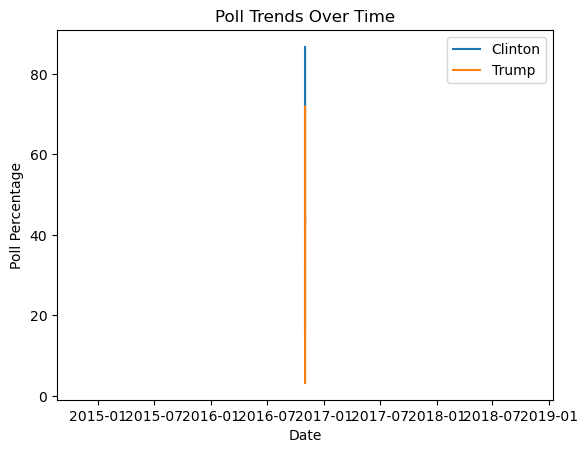

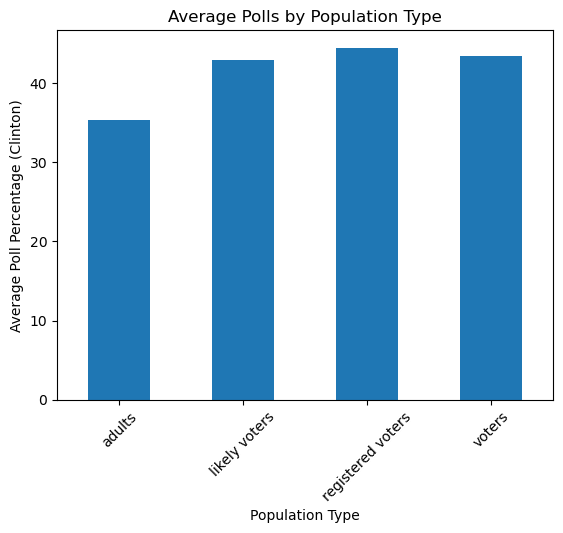

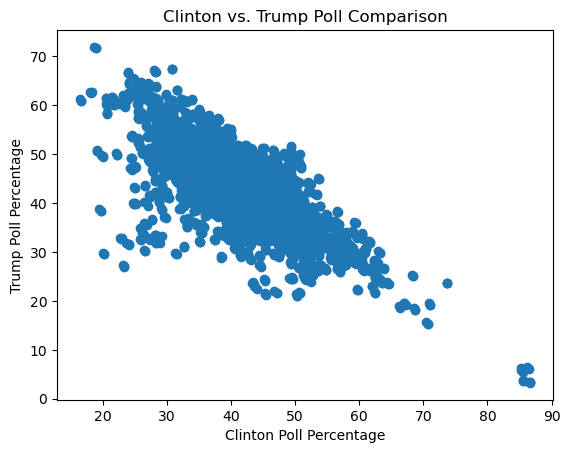

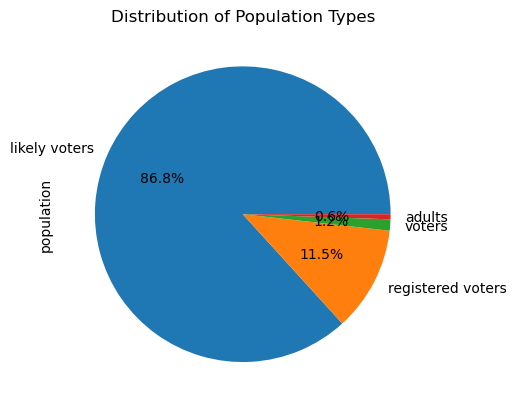

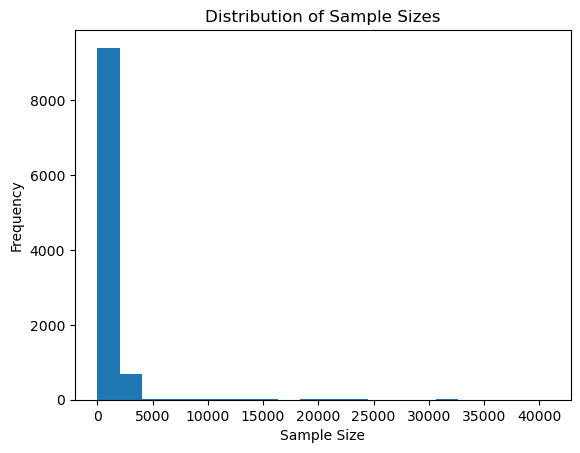

/var/folders/2h/v467wz0562dfskh2fgt2pqhm0000gn/T/ipykernel_27844/3414331787.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned_2016_polls.corr()


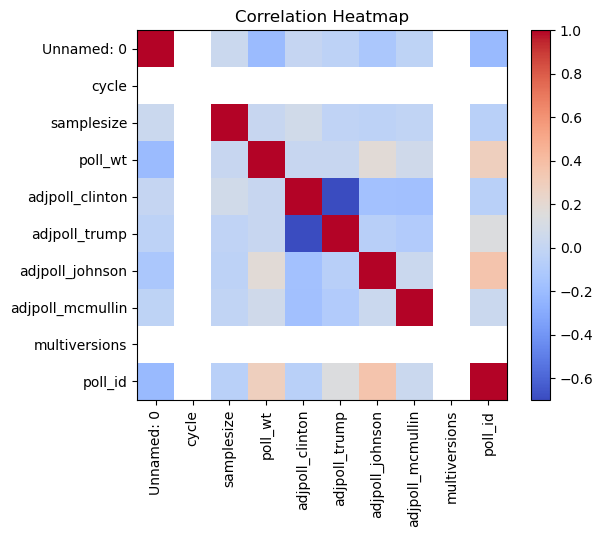

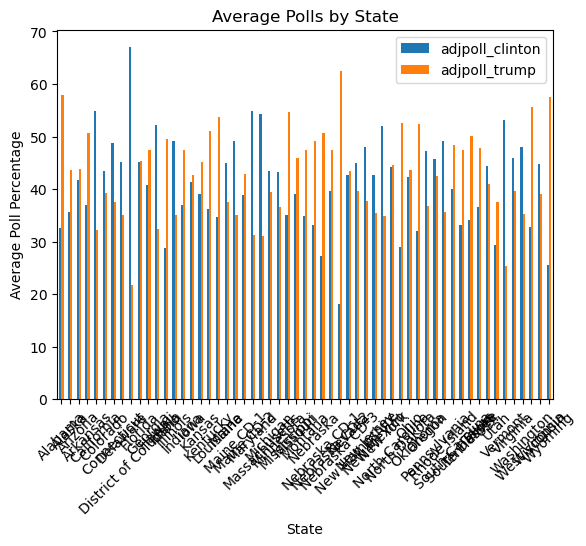

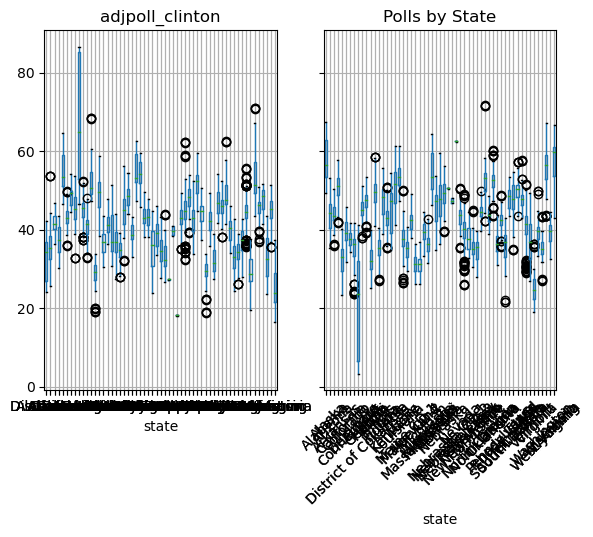

In [9]:
# Time Series Plot
df_cleaned_2016_polls["forecastdate"] = pd.to_datetime(df_cleaned_2016_polls["forecastdate"])
plt.plot(df_cleaned_2016_polls["forecastdate"], df_cleaned_2016_polls["adjpoll_clinton"], label="Clinton")
plt.plot(df_cleaned_2016_polls["forecastdate"], df_cleaned_2016_polls["adjpoll_trump"], label="Trump")
plt.xlabel("Date")
plt.ylabel("Poll Percentage")
plt.title("Poll Trends Over Time")
plt.legend()
plt.show()

# Bar Plot
avg_polls = df_cleaned_2016_polls.groupby("population")["adjpoll_clinton"].mean()
avg_polls.plot(kind="bar")
plt.xlabel("Population Type")
plt.ylabel("Average Poll Percentage (Clinton)")
plt.title("Average Polls by Population Type")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot
plt.scatter(df_cleaned_2016_polls["adjpoll_clinton"], df_cleaned_2016_polls["adjpoll_trump"])
plt.xlabel("Clinton Poll Percentage")
plt.ylabel("Trump Poll Percentage")
plt.title("Clinton vs. Trump Poll Comparison")
plt.show()

# Pie Chart
population_counts = df_cleaned_2016_polls["population"].value_counts()
population_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Population Types")
plt.show()

# Histogram
plt.hist(df_cleaned_2016_polls["samplesize"], bins=20)
plt.xlabel("Sample Size")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Sizes")
plt.show()

# Heatmap or Correlation Plot
corr_matrix = df_cleaned_2016_polls.corr()
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

# Grouped Bar Plot
avg_polls_by_state = df_cleaned_2016_polls.groupby("state")[["adjpoll_clinton", "adjpoll_trump"]].mean()
avg_polls_by_state.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Average Poll Percentage")
plt.title("Average Polls by State")
plt.xticks(rotation=45)
plt.show()

# Box Plot
df_cleaned_2016_polls.boxplot(column=["adjpoll_clinton", "adjpoll_trump"], by="state")
plt.ylabel("Poll Percentage")
plt.title("Polls by State")
plt.suptitle("")  # To remove the automatic title added by pandas
plt.xticks(rotation=45)
plt.show()


# WHO WILL BE PRESIDENT?! 🤷‍♂️